In [5]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
#Load Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Preprocess Data
#Drop CustomerID, encode Gender
df_clean = df.drop("CustomerID", axis=1)
df_clean["Gender"] = df_clean["Gender"].map({"Male": 0, "Female": 1})

#Optional scaling (for better clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

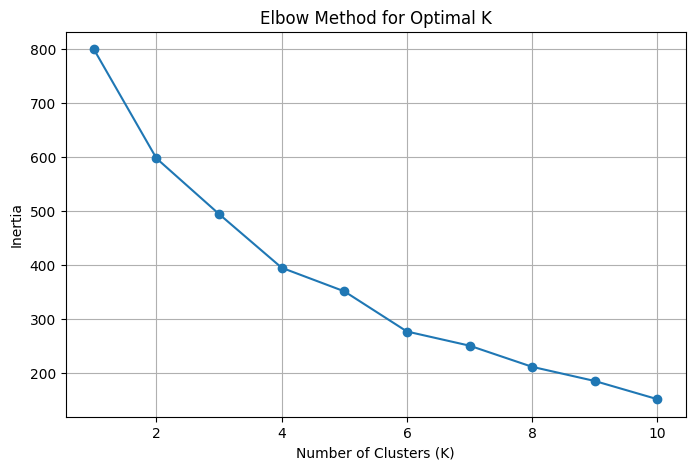

In [8]:
#Elbow Method to Find Optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [9]:
#K-Means Clustering
#Let's assume optimal K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(scaled_data)

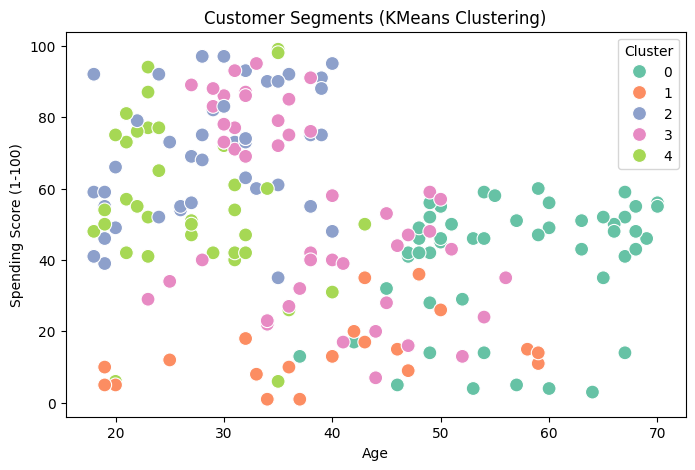

In [10]:
#Visualize Clusters (Age vs Spending Score)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Cluster", data=df_clean, palette="Set2", s=100)
plt.title("Customer Segments (KMeans Clustering)")
plt.show()

In [12]:
#Silhouette Score
score = silhouette_score(scaled_data, df_clean["Cluster"])
print(f"Silhouette Score: {score*100:.3f}")

Silhouette Score: 27.191
